In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salju_test.csv to salju_test.csv
Saving salju_train.csv to salju_train.csv


# Decision Tree Classifier

## Salju Train Dataset

In [ ]:
#open dataset
import pandas as pd

df = pd.read_csv('salju_train.csv')
df.head()

id     Tanggal KodeLokasi  ...  Suhu3pm  BersaljuHariIni  BersaljuBesok
0   1  01/06/2014         C4  ...     15.0               Ya          Tidak
1   2  15/07/2014        C10  ...     15.5               Ya             Ya
2   3  16/02/2011        C46  ...     29.6            Tidak          Tidak
3   4  08/08/2012        C36  ...     23.2            Tidak          Tidak
4   5  29/10/2016         C7  ...     18.1            Tidak          Tidak

[5 rows x 24 columns]

In [ ]:
#drop id
df.drop('id', inplace=True, axis=1)

In [ ]:
#look null dat
print(df.isnull().sum())

Tanggal                         0
KodeLokasi                      0
SuhuMin                      1122
SuhuMax                       929
Hujan                        2431
Penguapan                   47024
SinarMatahari               52379
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
ArahAngin9am                 7923
ArahAngin3pm                 3197
KecepatanAngin9am            1353
KecepatanAngin3pm            2303
Kelembaban9am                2002
Kelembaban3pm                3374
Tekanan9am                  11327
Tekanan3pm                  11308
Awan9am                     41844
Awan3pm                     44471
Suhu9am                      1340
Suhu3pm                      2698
BersaljuHariIni              2431
BersaljuBesok                2431
dtype: int64


In [ ]:
#replace null data with mean 
df.fillna(df.mean(), inplace=True)

In [ ]:
#look null data
print(df.isnull().sum())

Tanggal                        0
KodeLokasi                     0
SuhuMin                        0
SuhuMax                        0
Hujan                          0
Penguapan                      0
SinarMatahari                  0
ArahAnginTerkencang         7744
KecepatanAnginTerkencang       0
ArahAngin9am                7923
ArahAngin3pm                3197
KecepatanAngin9am              0
KecepatanAngin3pm              0
Kelembaban9am                  0
Kelembaban3pm                  0
Tekanan9am                     0
Tekanan3pm                     0
Awan9am                        0
Awan3pm                        0
Suhu9am                        0
Suhu3pm                        0
BersaljuHariIni             2431
BersaljuBesok               2431
dtype: int64


In [ ]:
#replace null data (string type) with mode that data
df['ArahAnginTerkencang'] = df['ArahAnginTerkencang'].fillna(df['ArahAnginTerkencang'].mode()[0])
df['ArahAngin9am'] = df['ArahAngin9am'].fillna(df['ArahAngin9am'].mode()[0])
df['ArahAngin3pm'] = df['ArahAngin3pm'].fillna(df['ArahAngin3pm'].mode()[0])
df['BersaljuHariIni'] = df['BersaljuHariIni'].fillna(df['BersaljuHariIni'].mode()[0])
df['BersaljuBesok'] = df['BersaljuBesok'].fillna(df['BersaljuBesok'].mode()[0])

In [ ]:
#look null data
df.isnull().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

In [ ]:
#look data
df.head()

Tanggal KodeLokasi  SuhuMin  ...  Suhu3pm  BersaljuHariIni  BersaljuBesok
0  01/06/2014         C4     10.4  ...     15.0               Ya          Tidak
1  15/07/2014        C10      9.0  ...     15.5               Ya             Ya
2  16/02/2011        C46     18.2  ...     29.6            Tidak          Tidak
3  08/08/2012        C36      7.3  ...     23.2            Tidak          Tidak
4  29/10/2016         C7      5.9  ...     18.1            Tidak          Tidak

[5 rows x 23 columns]

In [ ]:
df['KodeLokasi'].unique()
df['ArahAnginTerkencang'].unique()

array(['WSW', 'W', 'ESE', 'SSW', 'N', 'SW', 'WNW', 'ENE', 'S', 'SE',
       'SSE', 'E', 'NNW', 'NW', 'NE', 'NNE'], dtype=object)

In [ ]:
#apply pandas cross-tabulation to examine the relationship between Arah Angin 9 am and Arah Angin 3 pm attributes with respect to the class
pd.crosstab([df['ArahAngin9am'],df['ArahAngin3pm']],df['BersaljuBesok'])

BersaljuBesok              Tidak   Ya
ArahAngin9am ArahAngin3pm            
E            E               963  207
             ENE             653  155
             ESE             729  114
             N               237   61
             NE              403  100
...                          ...  ...
WSW          SSW             374  142
             SW              663  203
             W               481  168
             WNW             165   76
             WSW             803  226

[256 rows x 2 columns]

In [ ]:
#replace string to number
df['BersaljuBesok'] = df['BersaljuBesok'].replace(['Ya'],'1')
df['BersaljuBesok'] = df['BersaljuBesok'].replace(['Tidak'],'0')

#df['column name'] = df['column name'].replace(['1st old value','2nd old value',...],['1st new value','2nd new value',...])

**Decision Tree**

In [ ]:
#decision tree
from sklearn import tree

trainY = df['BersaljuBesok']
trainX = df.drop(['Tanggal','BersaljuBesok','ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm','BersaljuHariIni','KodeLokasi'],axis=1)

## Salju Test Dataset

In [ ]:
#open test data
#open dataset

df2 = pd.read_csv('salju_test.csv')
df2.head()

Tanggal KodeLokasi  SuhuMin  ...  Suhu3pm  BersaljuHariIni  BersaljuBesok
0  04/11/2010        C39     11.0  ...     23.6               No             No
1  26/03/2015        C35     10.0  ...     18.9               No            Yes
2  22/03/2016        C18      9.2  ...     26.3               No             No
3  09/12/2011        C31     17.7  ...     26.4               No             No
4  20/05/2017        C14      2.3  ...      6.0              Yes             No

[5 rows x 23 columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tanggal                   18182 non-null  object 
 1   KodeLokasi                18182 non-null  object 
 2   SuhuMin                   18017 non-null  float64
 3   SuhuMax                   18017 non-null  float64
 4   Hujan                     17795 non-null  float64
 5   Penguapan                 10326 non-null  float64
 6   SinarMatahari             9464 non-null   float64
 7   ArahAnginTerkencang       16901 non-null  object 
 8   KecepatanAnginTerkencang  16908 non-null  float64
 9   ArahAngin9am              16874 non-null  object 
 10  ArahAngin3pm              17686 non-null  object 
 11  KecepatanAngin9am         17984 non-null  float64
 12  KecepatanAngin3pm         17828 non-null  float64
 13  Kelembaban9am             17852 non-null  float64
 14  Kelemb

In [ ]:
#look null data
print(df2.isnull().sum())

Tanggal                        0
KodeLokasi                     0
SuhuMin                      165
SuhuMax                      165
Hujan                        387
Penguapan                   7856
SinarMatahari               8718
ArahAnginTerkencang         1281
KecepatanAnginTerkencang    1274
ArahAngin9am                1308
ArahAngin3pm                 496
KecepatanAngin9am            198
KecepatanAngin3pm            354
Kelembaban9am                330
Kelembaban3pm                548
Tekanan9am                  1865
Tekanan3pm                  1853
Awan9am                     7042
Awan3pm                     7456
Suhu9am                      219
Suhu3pm                      442
BersaljuHariIni              387
BersaljuBesok                419
dtype: int64


In [ ]:
#replace null data with mean 
df2.fillna(df.mean(), inplace=True)

#replace null data (string type) with mode that data
df2['ArahAnginTerkencang'] = df2['ArahAnginTerkencang'].fillna(df2['ArahAnginTerkencang'].mode()[0])
df2['ArahAngin9am'] = df2['ArahAngin9am'].fillna(df2['ArahAngin9am'].mode()[0])
df2['ArahAngin3pm'] = df2['ArahAngin3pm'].fillna(df2['ArahAngin3pm'].mode()[0])
df2['BersaljuHariIni'] = df2['BersaljuHariIni'].fillna(df2['BersaljuHariIni'].mode()[0])
df2['BersaljuBesok'] = df2['BersaljuBesok'].fillna(df2['BersaljuBesok'].mode()[0])

In [ ]:
#look null dat
print(df2.isnull().sum())

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64


In [ ]:
#apply pandas cross-tabulation to examine the relationship between Arah Angin 9 am and Arah Angin 3 pm attributes with respect to the class
pd.crosstab([df2['ArahAngin9am'],df2['ArahAngin3pm']],df2['BersaljuBesok'])

BersaljuBesok              inf   No  Yes
ArahAngin9am ArahAngin3pm               
E            E               7  152   33
             ENE             4  101   22
             ESE             0  123   22
             N               0   46    8
             NE              1   77   17
...                        ...  ...  ...
WSW          SSW             4   41   25
             SW              4  109   40
             W               1   74   23
             WNW             2   25   14
             WSW             3  120   52

[256 rows x 3 columns]

In [ ]:
#replace string to number
df2['BersaljuBesok'] = df2['BersaljuBesok'].replace(['Yes'],'1')
df2['BersaljuBesok'] = df2['BersaljuBesok'].replace(['No'],'0')

df2['BersaljuHariIni'] = df2['BersaljuHariIni'].replace(['Yes'],'Ya')
df2['BersaljuHariIni'] = df2['BersaljuHariIni'].replace(['No'],'Tidak')
df2.head()

Tanggal KodeLokasi  SuhuMin  ...  Suhu3pm  BersaljuHariIni  BersaljuBesok
0  04/11/2010        C39     11.0  ...     23.6            Tidak              0
1  26/03/2015        C35     10.0  ...     18.9            Tidak              1
2  22/03/2016        C18      9.2  ...     26.3            Tidak              0
3  09/12/2011        C31     17.7  ...     26.4            Tidak              0
4  20/05/2017        C14      2.3  ...      6.0               Ya              0

[5 rows x 23 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Tanggal                   109095 non-null  object 
 1   KodeLokasi                109095 non-null  object 
 2   SuhuMin                   109095 non-null  float64
 3   SuhuMax                   109095 non-null  float64
 4   Hujan                     109095 non-null  float64
 5   Penguapan                 109095 non-null  float64
 6   SinarMatahari             109095 non-null  float64
 7   ArahAnginTerkencang       109095 non-null  object 
 8   KecepatanAnginTerkencang  109095 non-null  float64
 9   ArahAngin9am              109095 non-null  object 
 10  ArahAngin3pm              109095 non-null  object 
 11  KecepatanAngin9am         109095 non-null  float64
 12  KecepatanAngin3pm         109095 non-null  float64
 13  Kelembaban9am             109095 non-null  f

In [ ]:
#extract the predictor and target class attributes from test data 
#and apply decision tree classifier to predict thei classes
#using .astype(str) because Bersalju is string, and we want to str to compute the accuracy in the next step
testY = df2['BersaljuBesok'].astype(str)
testX = df2.drop(['Tanggal','BersaljuBesok','ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm','BersaljuHariIni','KodeLokasi'],axis=1)

# Building Decision Tree Model


In [ ]:
feature_cols = ['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm', 'Suhu9am', 'Suhu3pm']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(trainX,trainY)

#Predict the response for test dataset
y_pred = clf.predict(testX)

Evaluating Model

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(testY, y_pred))

Accuracy: 0.7676273237267627


Disini kita mendapat tingkat klasifikasi 76.92%, dianggap sebagai akurasi yang baik. Kita dapat meningkatkan akurasi ini dengan menyetel parameter dalam Algoritma Decision Tree.

Visualizing Decision Trees

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0496422 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0496422 to fit



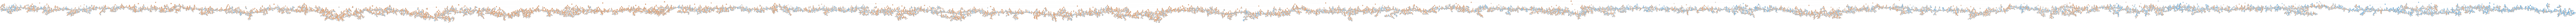

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Tidak','Ya'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('salju.png')
Image(graph.create_png())

Optimizing Decision Tree Performance - Memangkas Decision Tree

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(trainX,trainY)

#Predict the response for test dataset
y_pred = clf.predict(testX)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(testY, y_pred))

Accuracy: 0.8117918820811791


Visualizing Decision Trees

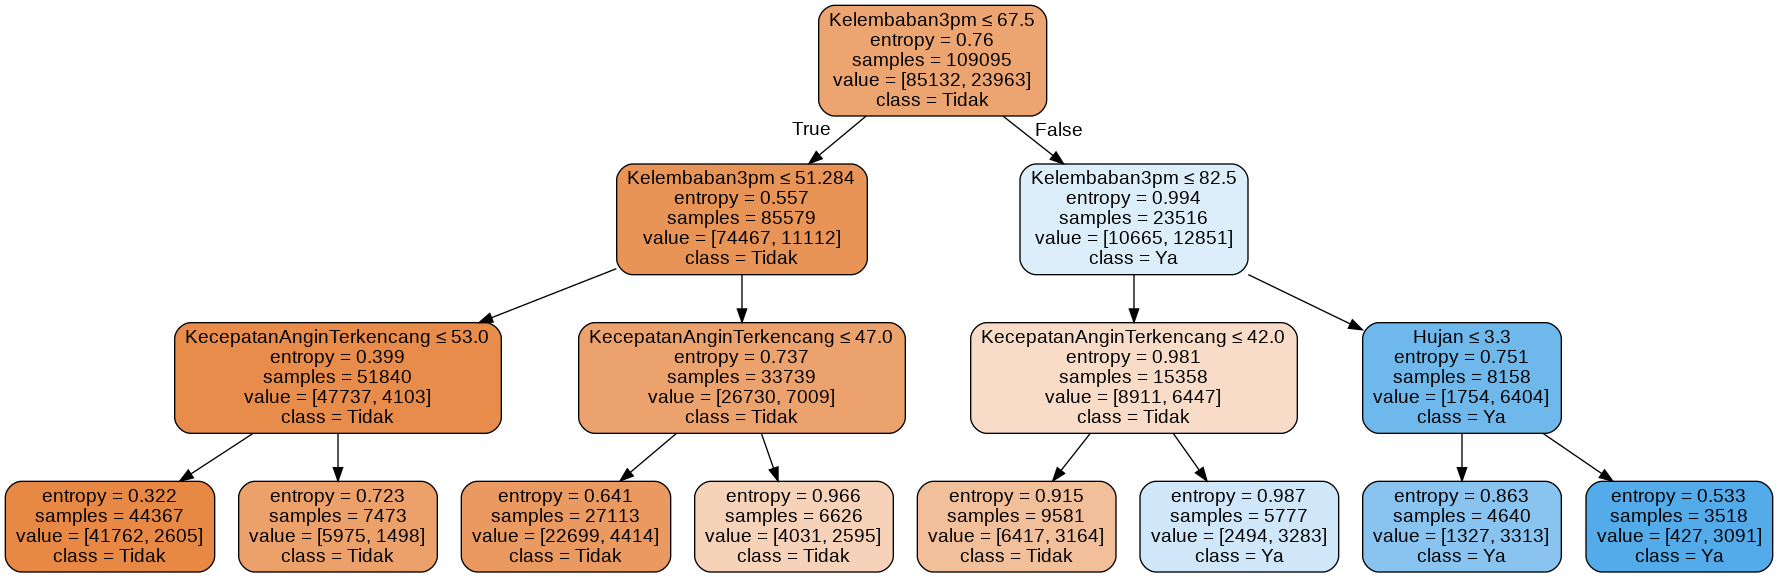

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Tidak','Ya'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('saljusetelahdipangkas.png')
Image(graph.create_png())

Setelah dipangkas, decision tree tersebut menjadi tidak terlalu kompleks, dapat dijelaskan dan mudah dipahami dibandingkan dengan plot model decision tree sebelumnya